# Árbol de Decision Calidad del vino tinto
John Jherzon Siabato

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Información de la data

In [5]:
data = pd.read_csv("./winequality-red.csv")
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


_Cantidad de filas y columnas_

In [8]:
data.shape

(1599, 12)

### Descripción de los datos

In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Validamos los datos atípicos

In [12]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Gráficos

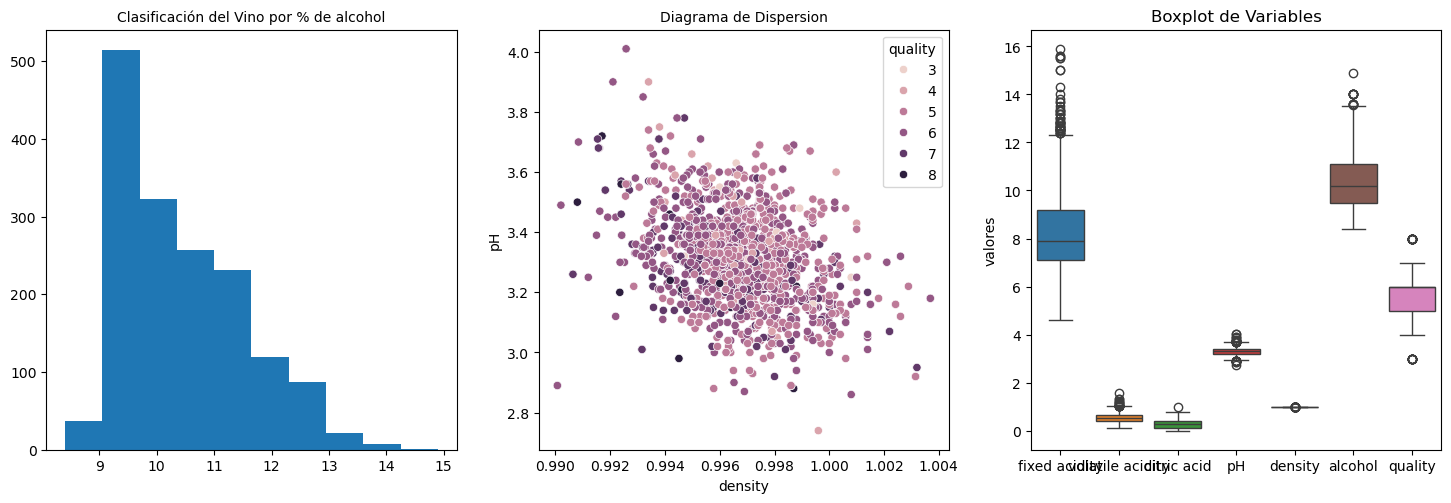

In [49]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.hist(data.alcohol)
plt.title('Clasificación del Vino por % de alcohol', fontsize=10 )

plt.subplot(2, 3, 2)
sns.scatterplot(x ="density", y ="pH", hue ="quality", data = data)
plt.title('Diagrama de Dispersion', fontsize=10 )

plt.subplot(2, 3, 3)
sns.boxplot(data=data[["fixed acidity","volatile acidity","citric acid", "pH","density","alcohol","quality"]])
plt.title("Boxplot de Variables")
plt.ylabel("valores")
plt.show()

### Entrenamiento del modelo

In [59]:
predictors_col = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide", "pH","density","sulphates","alcohol"]
target_col = ['quality']

In [61]:
predictors = data[predictors_col]
target = data[target_col]

In [63]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,density,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,3.51,0.99780,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,3.20,0.99680,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,3.26,0.99700,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,3.16,0.99800,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,3.51,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,3.45,0.99490,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,3.52,0.99512,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,3.42,0.99574,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,3.57,0.99547,0.71,10.2


In [65]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,density,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.682978,0.668047,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.234937,0.022026,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,-0.541904,0.364947,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,-0.085652,0.355283,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,-0.265026,0.200632,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.070377,-0.021946,0.051658,-0.069408
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,1.000000,-0.341699,-0.196648,0.205633
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,-0.341699,1.000000,0.148506,-0.496180
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,-0.196648,0.148506,1.000000,0.093595
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.221141,-0.069408,0.205633,-0.496180,0.093595,1.000000


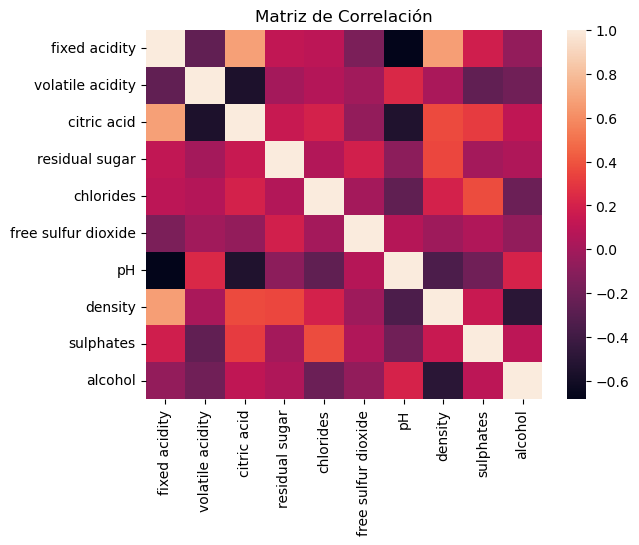

In [93]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

### Split del DataSet

In [69]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [71]:
tree = DecisionTreeClassifier()

In [73]:
arbol = tree.fit(X_train, y_train)

[Text(0.49121229707388625, 0.9782608695652174, 'x[9] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.15746002075875098, 0.9347826086956522, 'x[8] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.3243361589163186, 0.9565217391304348, 'True  '),
 Text(0.03371121718377088, 0.8913043478260869, 'x[1] <= 0.335\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.012728719172633254, 0.8478260869565217, 'x[4] <= 0.082\ngini = 0.562\nsamples = 11\nvalue = [0, 1, 4, 6, 0, 0]'),
 Text(0.00954653937947494, 0.8043478260869565, 'x[4] <= 0.059\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.006364359586316627, 0.7608695652173914, 'x[2] <= 0.29\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.0031821797931583136, 0.717391304347826, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.00954653937947494, 0.717391304347826, 'gini = 0.0\nsamples = 1\nvalue = [

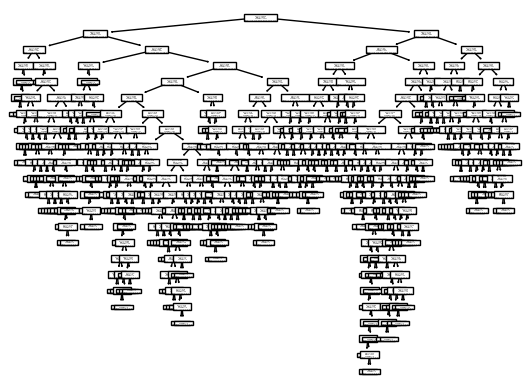

In [91]:
plot_tree(arbol)

In [77]:
predicciones = arbol.predict(X_test)

In [89]:
predicciones

array([6, 6, 5, 5, 6, 5, 5, 8, 5, 5, 5, 6, 5, 5, 7, 5, 6, 4, 5, 7, 5, 6,
       6, 5, 5, 5, 5, 4, 4, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 7, 5, 5, 6, 6,
       4, 7, 6, 5, 6, 6, 5, 5, 6, 5, 7, 5, 5, 8, 6, 5, 6, 5, 5, 7, 7, 7,
       6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 7, 5, 6, 6,
       7, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 4, 6, 6, 5, 6, 6, 5, 6, 5, 7,
       5, 7, 6, 6, 6, 6, 6, 7, 5, 6, 5, 5, 5, 6, 4, 4, 5, 5, 6, 7, 6, 5,
       5, 7, 5, 6, 7, 5, 6, 7, 5, 5, 5, 6, 7, 4, 6, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 6, 6, 6, 6, 5, 6, 4, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 7, 5, 6, 7,
       5, 5, 6, 6, 7, 6, 6, 5, 6, 5, 7, 5, 5, 5, 6, 6, 7, 5, 6, 6, 6, 7,
       5, 5, 6, 5, 7, 6, 5, 6, 4, 7, 6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 6,
       5, 5, 5, 6, 7, 5, 5, 5, 6, 6, 5, 5, 7, 7, 5, 7, 5, 6, 4, 6, 7, 5,
       5, 5, 6, 7, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5,
       6, 7, 4, 5, 6, 6, 5, 7, 5, 5, 5, 5, 5, 6, 5,

### Matriz de confusión

In [81]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,4,5,6,7,8
Actual,,,,,
3,0,0,1,0,0
4,4,3,0,1,0
5,5,97,38,6,0
6,3,37,71,12,1
7,1,4,11,18,1
8,0,1,4,1,0


In [83]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.59375

In [85]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.59375

In [87]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.5917811708756094